In [1]:
import requests
from bs4 import BeautifulSoup

* https://www.lumberjack.com/it/sport_shoes?gender=woman
* https://www.lumberjack.com/it/sandals?gender=woman
* https://www.lumberjack.com/it/boat-shoes?gender=woman
* https://www.lumberjack.com/it/ankle-boots?gender=woman
* https://www.lumberjack.com/it/beatles?gender=woman
* https://www.lumberjack.com/it/outdoor?gender=woman

In [2]:
nomi=[]
prezzi=[]
modello=[]
marca=[]

#modello=['Sneakers','Sandali','Stivali e stivaletti','Scarpe basse']
#pagine=["https://www.lumberjack.com/it/sport_shoes?gender=woman"]#,
       # "https://www.lumberjack.com/it/sandals?gender=woman",
        #"https://www.lumberjack.com/it/ankle-boots?gender=woman",
        #"https://www.lumberjack.com/it/outdoor?gender=woman"]

In [3]:
# Sneakers
urlpagine="https://www.lumberjack.com/it/sport_shoes?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Sneakers")               
    i+=1     

In [4]:
# Sandali
urlpagine="https://www.lumberjack.com/it/sandals?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Sandali")               
    i+=1    

In [5]:
# Scarpe basse
urlpagine="https://www.lumberjack.com/it/ankle-boots?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Stivali e stivaletti")
                   
    i+=1   

In [6]:
# Stivali e stivaletti
urlpagine="https://www.lumberjack.com/it/outdoor?gender=woman"
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
nomi_scarpe=soup.find_all("div", class_="product__name")
for nome in nomi_scarpe:
    nomi.append(nome.text.strip())
    prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
for p in prezzi_soup:
    p=p.text.strip()
    p=p.replace("\xa0EUR", "")
    p=p.replace(",",".")
    p=float(p)
    prezzi.append(p)
    marca.append("Lumberjack")              
    modello.append("Scarpe basse")       

In [7]:
len(nomi)

228

In [8]:
len(prezzi)

228

In [9]:
len(marca)

228

In [10]:
len(modello)

228

In [11]:
import pandas as pd
Lumberjack={
    "marca":marca,
    "modello":modello,
    "name":nomi,
    "prezzi":prezzi,
}
dfl=pd.DataFrame(Lumberjack)
dfl

marca       modello                             name  prezzi
0    Lumberjack      Sneakers             FREYA SNEAKERS DONNA   49.99
1    Lumberjack      Sneakers             FREYA SNEAKERS DONNA   49.99
2    Lumberjack      Sneakers           CECILIA SNEAKERS DONNA   69.99
3    Lumberjack      Sneakers              DORIS SNEAKER DONNA   59.99
4    Lumberjack      Sneakers              HILDA SNEAKER DONNA   89.99
..          ...           ...                              ...     ...
223  Lumberjack  Scarpe basse    ELECTRIC SCARPE OUTDOOR DONNA   34.99
224  Lumberjack  Scarpe basse             VABORY OUTDOOR DONNA   59.99
225  Lumberjack  Scarpe basse  STOWE Scarponcino outdoor Donna   34.99
226  Lumberjack  Scarpe basse            MODESTA OUTDOOR DONNA   39.99
227  Lumberjack  Scarpe basse    ELECTRIC SCARPE OUTDOOR DONNA   39.99

[228 rows x 4 columns]

In [12]:
dflg=dfl.groupby("modello")

In [13]:
dflg.modello.count()

modello
Sandali                  59
Scarpe basse             12
Sneakers                123
Stivali e stivaletti     34
Name: modello, dtype: int64

* i modelli offerti dal competitor Kammi sono 16 per tipologia, però sono in maggior numero.
* 
**Si potrebbe pensare di sviluppare altre line di prodotto non gestite tipo:Scarpe con tacco e Zeppe**

<Axes: xlabel='count', ylabel='modello'>

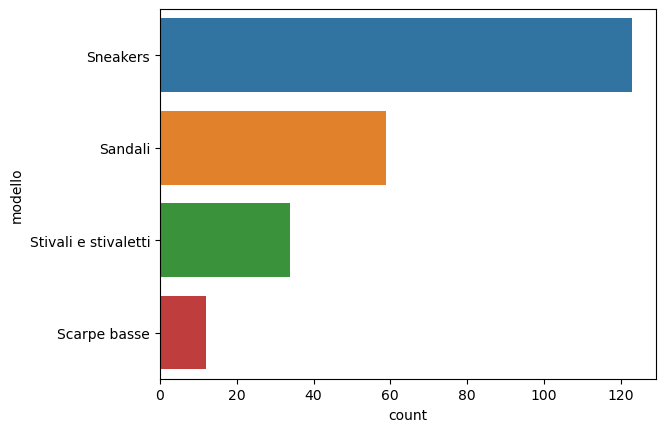

In [25]:
sns.countplot(data=dfl,y="modello")

In [18]:
dflg.prezzi.describe()

count       mean        std    min    25%    50%    75%  \
modello                                                                         
Sandali                59.0  58.566271  10.420807  39.99  49.99  59.99  69.99   
Scarpe basse           12.0  45.406667   7.216878  34.99  39.99  44.99  49.99   
Sneakers              123.0  48.030650  17.214842  19.99  36.49  44.99  59.99   
Stivali e stivaletti   34.0  57.637059  14.419857  34.99  49.99  49.99  69.99   

                        max  
modello                      
Sandali               74.99  
Scarpe basse          59.99  
Sneakers              89.99  
Stivali e stivaletti  79.99

In [20]:
dflg_prezzi=dflg.prezzi.describe()
dflg_prezzi_mean=dflg_prezzi.loc[:,"mean"]
dflg_prezzi_mean

modello
Sandali                 58.566271
Scarpe basse            45.406667
Sneakers                48.030650
Stivali e stivaletti    57.637059
Name: mean, dtype: float64

* i prezzi in media sono più bassi per ogni tipologia di prodotto

<Axes: xlabel='modello', ylabel='prezzi'>

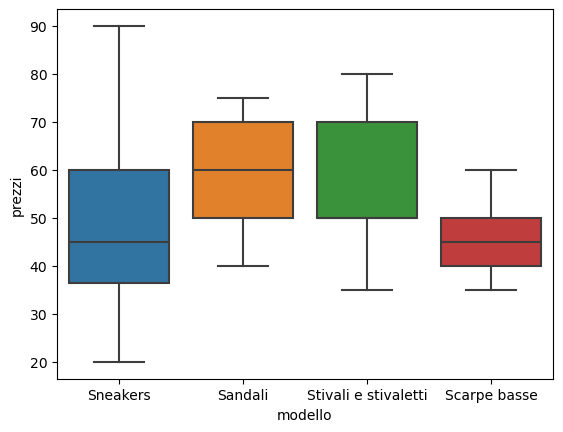

In [15]:
import seaborn as sns
sns.boxplot(data=dfl,x="modello",y="prezzi")

<Axes: xlabel='mean', ylabel='modello'>

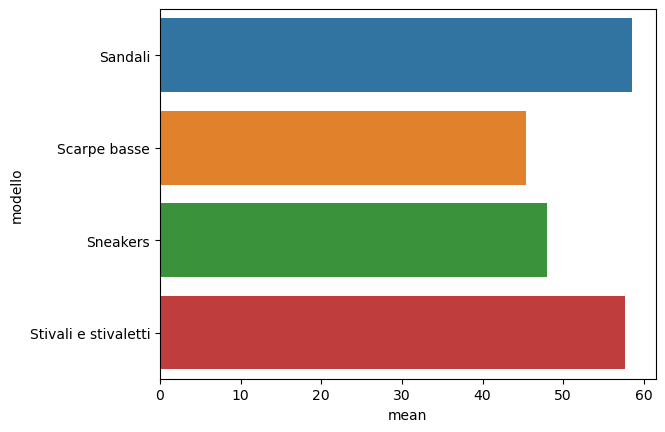

In [22]:
sns.barplot(y=dflg_prezzi_mean.index,x=dflg_prezzi_mean)

<Axes: ylabel='modello'>

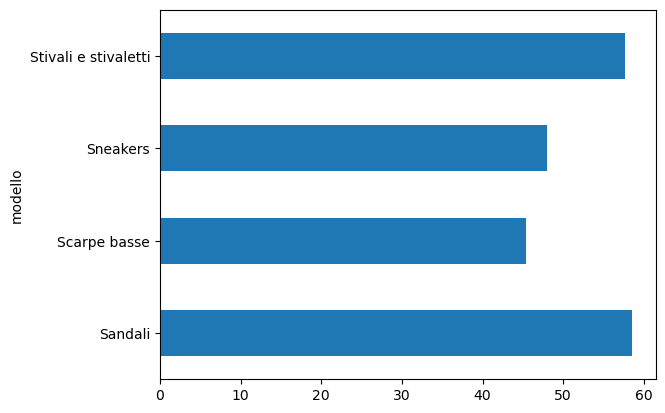

In [24]:
dflg_prezzi_mean.plot(kind="barh",x="mean")